In [1]:
import numpy as np

In [2]:
def johnson2M(jobMatrix):
    nb_machine, nb_jobs = jobMatrix.shape
    jobMatrix = np.vstack((jobMatrix,list(range(nb_jobs))))

    jobOrder = [0] * nb_jobs
    idxJob1, idxJob2 = (0, nb_jobs-1)

    for _ in range(nb_jobs):
        idx = jobMatrix.argmin(axis=1)

        if (jobMatrix[0,idx[0]]<jobMatrix[1,idx[1]]):
            jobOrder[idxJob1] = int(jobMatrix[2,idx[0]])
            idxJob1 += 1
            jobMatrix = np.delete(jobMatrix,idx[0],1)
        else:
            jobOrder[idxJob2] = int(jobMatrix[2,idx[1]])
            idxJob2 -= 1
            jobMatrix = np.delete(jobMatrix,idx[1],1)
    
    return jobOrder

In [3]:
def makeGanttTable(jobMatrix,jobOrder):
    nb_machine, _ = jobMatrix.shape
    nb_jobs = len(jobOrder)
    ganttTable = np.zeros((nb_jobs,nb_machine*2))
    """ganttTable[0,0] = 0
    ganttTable[0,1] = jobMatrix[0,jobOrder[0]]
    ganttTable[0,2] = jobMatrix[0,jobOrder[0]]
    ganttTable[0,3] = jobMatrix[0,jobOrder[0]] + jobMatrix[1,jobOrder[0]]"""
    for i in range(0,nb_jobs):
        for j in range(0,nb_machine):
            ganttTable[i,2*j] = max(ganttTable[i-1,2*j+1],ganttTable[i,2*j-1])# Start of the job "i" in machine "j"
            ganttTable[i,2*j+1] = ganttTable[i,2*j] + jobMatrix[j,jobOrder[i]] # End of the job "i" in machine "j"
            
    return ganttTable


In [4]:
def makespan(jobMatrix,jobOrder):
    return makeGanttTable(jobMatrix,jobOrder)[-1,-1]

In [5]:
def neh(jobMatrix):
    nb_machine, nb_jobs = jobMatrix.shape
    jobs_with_total_times = [(job_id, sum(job)) for job_id, job in enumerate(jobMatrix.T)]
    order = []
    for job in sorted(jobs_with_total_times, key=lambda x: x[1], reverse = True):
        candidates = []
        for i in range(0, len(order) + 1):
            candidate = order[:i] + [job[0]] + order[i:]
            candidates.append((candidate, makespan(jobMatrix,candidate)))
        order = min(candidates, key = lambda x: x[1])[0]
    return order

In [6]:
from itertools import permutations

def optimal(jobMatrix):
    nb_machine, nb_jobs = jobMatrix.shape
    return min(permutations(range(nb_jobs)),key = lambda x: makespan(jobMatrix,x))

# Johnson 2 Machines :

In [7]:
jobMatrix = np.loadtxt(fname='jobMatrix.txt')

jobOrder = johnson2M(jobMatrix)
print(jobOrder)

[2, 4, 3, 1, 5, 0]


In [8]:
makeGanttTable(jobMatrix,jobOrder)

array([[  0.,   8.,   8.,  21.],
       [  8.,  19.,  21.,  35.],
       [ 19.,  46.,  46.,  66.],
       [ 46.,  78.,  78.,  97.],
       [ 78.,  94.,  97., 104.],
       [ 94., 109., 109., 115.]])

In [9]:
makespan(jobMatrix,jobOrder)

115.0

# NEH Algorithm

In [10]:
jobMatrix = np.loadtxt(fname='jobMatrix2.txt').T

jobOrder = neh(jobMatrix)
print(jobOrder)


[7, 0, 4, 8, 2, 10, 3, 6, 5, 1, 9]


In [11]:
makeGanttTable(jobMatrix,jobOrder)

array([[   0.,   14.,   14.,  138.,  138.,  352.,  352.,  895.,  895.,
        1680.],
       [  14.,  389.,  389.,  401.,  401.,  543.,  895., 1140., 1680.,
        2092.],
       [ 389.,  917.,  917., 1018., 1018., 1807., 1807., 1931., 2092.,
        3091.],
       [ 917., 1174., 1174., 1701., 1807., 2560., 2560., 2770., 3091.,
        3554.],
       [1174., 1186., 1701., 2577., 2577., 2701., 2770., 3304., 3554.,
        4319.],
       [1186., 1718., 2577., 2879., 2879., 3380., 3380., 4145., 4319.,
        5307.],
       [1718., 2178., 2879., 3421., 3421., 3944., 4145., 4265., 5307.,
        5806.],
       [2178., 2710., 3421., 3651., 3944., 4487., 4487., 5383., 5806.,
        6258.],
       [2710., 3506., 3651., 3896., 4487., 5119., 5383., 5758., 6258.,
        6381.],
       [3506., 4138., 4138., 4590., 5119., 5877., 5877., 6155., 6381.,
        6779.],
       [4138., 5034., 5034., 5930., 5930., 6144., 6155., 6413., 6779.,
        7038.]])

In [12]:
makespan(jobMatrix,jobOrder)

7038.0

# Optimal Algorithm

In [20]:
jobMatrix = np.loadtxt(fname='jobMatrix3.txt')

jobOrder = optimal(jobMatrix)
print(jobOrder)

(1, 2, 3, 4, 5, 0)


In [21]:
makeGanttTable(jobMatrix,jobOrder)

array([[  0.,  32.,  32.,  51.,  51.,  83.,  83., 102.],
       [ 32.,  40.,  51.,  64.,  83.,  91., 102., 115.],
       [ 40.,  67.,  67.,  87.,  91., 118., 118., 138.],
       [ 67.,  78.,  87., 101., 118., 129., 138., 152.],
       [ 78.,  94., 101., 108., 129., 145., 152., 159.],
       [ 94., 109., 109., 115., 145., 160., 160., 166.]])

In [22]:
makespan(jobMatrix,jobOrder)

166.0

# Gantt

In [27]:
import matplotlib.pyplot as plt

def plotGantt(jobMatrix,jobOrder):
    fig, ax = plt.subplots()

    nb_machine, nb_jobs = jobMatrix.shape
    ganttTable = makeGanttTable(jobMatrix,jobOrder)
    makespan_val = ganttTable[-1,-1]
    for i in range(nb_jobs):
        ax.broken_barh([(ganttTable[i,0], ganttTable[i,1]-ganttTable[i,0]), (ganttTable[i,2], ganttTable[i,3]-ganttTable[i,2])], (10*i, 10), facecolors=('red', 'yellow'))

    ax.set_ylim(-10, 75)
    ax.set_xlim(0, makespan_val*1.2)
    ax.set_xlabel('Temps')
    ax.set_yticks([0,10,20, 30,40,50,60,70])
    ax.set_yticklabels(["Task1","Task1","Task1","Task1","Task1","Task1","Task1"])
    ax.grid(True)
    plt.savefig(fname="gantt.png")
    plt.show()


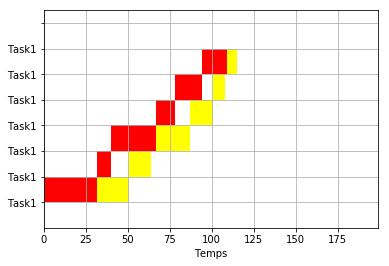

In [28]:
plotGantt(jobMatrix,jobOrder)